In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import time
import re
import nltk
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection  import train_test_split
# from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn import grid_search
# import scipy.io

d:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
d:\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
# data = pd.read_csv("data/movies.csv",index_col=0)
data = pd.read_csv("data/movies.csv")
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
#丢弃没有分类信息的数据
drop_data = data[data['genres'] == '(no genres listed)']
# drop_data['movieId'].count()
drop_data.to_csv('drop_movieId.csv')

In [64]:
data = data[data['genres'] != '(no genres listed)']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9708 entries, 0 to 9741
Data columns (total 2 columns):
movieId    9708 non-null int64
genres     9708 non-null object
dtypes: int64(1), object(1)
memory usage: 227.5+ KB


In [23]:
data['genres'].describe()

count      9708
unique      950
top       Drama
freq       1053
Name: genres, dtype: object

In [24]:
# 获得分类的数值信息
index = [ids for ids in range(len(data))]
num = [len(one.split('|')) for one in data['genres']]
average = sum(num)/len(num)

2.2713226205191597


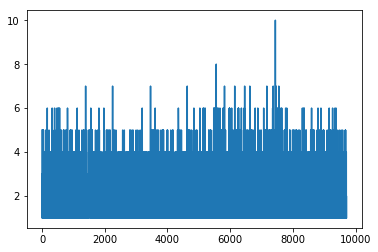

In [25]:
print(average)
plt.plot(index,num)
plt.show()

In [26]:
# 得到所有分类的列表
target = set([one for x in data["genres"] for one in x.split('|') ])
target

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [27]:
# 对所有行数据进行分词
data['genres'] = [' '.join(line.replace('-','').split('|')).lower() for line in data['genres']]
data.head()

,movieId,title,genres
0,1,Toy Story (1995),adventure animation children comedy fantasy
1,2,Jumanji (1995),adventure children fantasy
2,3,Grumpier Old Men (1995),comedy romance
3,4,Waiting to Exhale (1995),comedy drama romance
4,5,Father of the Bride Part II (1995),comedy


In [28]:
data['genres'][1]

'adventure children fantasy'

In [29]:
#丢弃不必要的列
data = data.drop('title',axis=1)
data.head()

,movieId,genres
0,1,adventure animation children comedy fantasy
1,2,adventure children fantasy
2,3,comedy romance
3,4,comedy drama romance
4,5,comedy


In [30]:
#进行tf_idf的训练
train_corpus = data['genres']
tfidf_model = TfidfVectorizer().fit(train_corpus)
print(tfidf_model.vocabulary_)
sparse_result = tfidf_model.transform(train_corpus)
print(sparse_result)

{'adventure': 1, 'animation': 2, 'children': 3, 'comedy': 4, 'fantasy': 8, 'romance': 14, 'drama': 7, 'action': 0, 'crime': 5, 'thriller': 16, 'horror': 10, 'mystery': 13, 'scifi': 15, 'war': 17, 'musical': 12, 'documentary': 6, 'imax': 11, 'western': 18, 'filmnoir': 9}
  (0, 8)	0.48301747178653426
  (0, 4)	0.26738777563975086
  (0, 3)	0.5048957307474672
  (0, 2)	0.5162876752057701
  (0, 1)	0.41680359510322523
  (1, 8)	0.5936766667075072
  (1, 3)	0.6205672299106341
  (1, 1)	0.5122932056626417
  (2, 14)	0.8211549883098352
  (2, 4)	0.5707052524498741
  (3, 14)	0.7264518207332316
  (3, 7)	0.46621627821471856
  (3, 4)	0.5048862585582906
  (4, 4)	1.0
  (5, 16)	0.54199651313536
  (5, 5)	0.6360178869502786
  (5, 0)	0.5492913864502283
  (6, 14)	0.8211549883098352
  (6, 4)	0.5707052524498741
  (7, 3)	0.7711748361437065
  (7, 1)	0.6366234146642168
  (8, 0)	1.0
  (9, 16)	0.5456887973497062
  (9, 1)	0.6295854449093398
  (9, 0)	0.5530333660868391
  :	:
  (9697, 15)	0.5913191062787809
  (9697, 4)	0.

In [31]:
#查看词表
tf_vocabulary = tfidf_model.vocabulary_
for key in tf_vocabulary.keys():
    print(key+":"+str(tf_vocabulary[key]))

adventure:1
animation:2
children:3
comedy:4
fantasy:8
romance:14
drama:7
action:0
crime:5
thriller:16
horror:10
mystery:13
scifi:15
war:17
musical:12
documentary:6
imax:11
western:18
filmnoir:9


In [32]:
#将得到的matix数据转为DataFrame数据矩阵
sparse_result = sparse_result.tocoo(copy=False)
tf_data = pd.DataFrame({'index': sparse_result.row, 'col': sparse_result.col, 'data': sparse_result.data}
                 )[['index', 'col', 'data']].sort_values(['index', 'col']
                 ).reset_index(drop=True)

In [33]:
tf_data.head()

,index,col,data
0,0,1,0.416804
1,0,2,0.516288
2,0,3,0.504896
3,0,4,0.267388
4,0,8,0.483017


In [16]:
tf_data.to_csv("tf_data.csv",index=False, sep='\t',encoding='utf-8')

In [11]:
#读数据来准备下一步
tf_ = pd.read_csv("tf_data.csv",sep='\t')
tf_.head()

,index,col,data
0,0,1,0.416804
1,0,2,0.516288
2,0,3,0.504896
3,0,4,0.267388
4,0,8,0.483017


In [12]:
# tf_vocabulary  词表  （key:value）
# data   原始数据  (movieID,genres)
# tf_   tf计算后数据  (index,col,data)
# store  新数据(movieID,genres)
# tf_.row == data.id
# tf_.col == tf_vocabulary.value

In [13]:
# 处理数据
for i in range(0,tf_['data'].count()):
    tf_.loc[i,'data'] = int(tf_['data'][i] * 5)
tf_.head()

,index,col,data
0,0,1,2.0
1,0,2,2.0
2,0,3,2.0
3,0,4,1.0
4,0,8,2.0


In [79]:
#新的数据变量   store
store = pd.DataFrame(columns=['movieId','genres','rate'])
for i_tf in range(0,tf_['data'].count()):
    index = tf_.loc[i_tf,'index']
    genres = tf_.loc[i_tf,'col']
    rate = tf_.loc[i_tf,'data']
    movie_id = data.iloc[index,0]
    store.loc[i_tf] = [format(movie_id,'.0f'),format(genres,'.0f'),format(rate,'.0f')]
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22050 entries, 0 to 22049
Data columns (total 3 columns):
movieId    22050 non-null object
genres     22050 non-null object
rate       22050 non-null object
dtypes: object(3)
memory usage: 689.1+ KB


In [80]:
store[0:20]

,movieId,genres,rate
0,1,1,2
1,1,2,2
2,1,3,2
3,1,4,1
4,1,8,2
5,2,1,2
6,2,3,3
7,2,8,2
8,3,4,2
9,3,14,4


In [82]:
#存储数据
store.to_csv('tf_idf_data.csv',index=False,encoding='utf-8')